In [1]:
pip install pandas scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xgboost


  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 217.9 kB/s eta 0:11:29
   ---------------------------------------- 0.0/150.0 MB 279.3 kB/s eta 0:08:57
   ---------------------------------------- 0.1/150.0 MB 363.1 kB/s eta 0:06:53
   ---------------------------------------- 0.1/150.0 MB 535.8 kB/s eta 0:04:40
   ---------------------------------------- 0.1/150.0 MB 535.8 kB/s eta 0:04:40
   ---------------------------------------- 0.2/150.0 MB 508.4 kB/s eta 0:04:55
   ---------------------------------------- 0.2/150.0 MB 653.6 kB/s eta 0:03:50
   ---------------------------------------- 0.3/150.0 MB 901.1 kB/s eta 0:02:47
   ---------------------------------------- 0.4/150.0 MB 922.1 kB/s eta 0:02:43
   ---------------------------------------- 0.5/150.0 MB 1.1 MB/s et

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_curve, auc,
    ConfusionMatrixDisplay, precision_recall_curve,
    average_precision_score
)


In [6]:
df = pd.read_csv(r"C:\Users\CHANDINI\OneDrive\Desktop\onlinefraud.csv")


# Show shape and first few rows
print(df.shape)
print(df.head(3))


(6362620, 11)
   step      type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT  9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT  1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER   181.00  C1305486145          181.0            0.00   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  


In [7]:
print("Missing Values:\n", df.isnull().sum())
df.dropna(inplace=True)

Missing Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


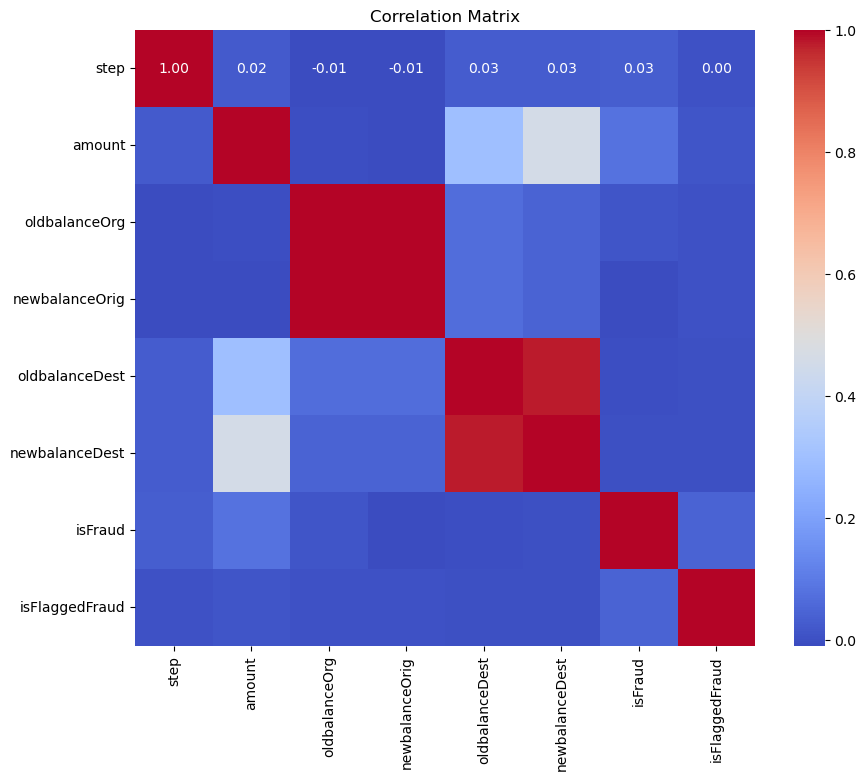

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [9]:
non_numeric_columns = ['nameOrig', 'nameDest', 'type']
df_model = df.drop(columns=non_numeric_columns)


In [10]:
X = df_model.drop('isFraud', axis=1)
y = df_model['isFraud']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)


C:\Users\CHANDINI\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:12:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [13]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]


In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9991167160697951


In [15]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.68      0.58      0.63      1620

    accuracy                           1.00   1272524
   macro avg       0.84      0.79      0.81   1272524
weighted avg       1.00      1.00      1.00   1272524



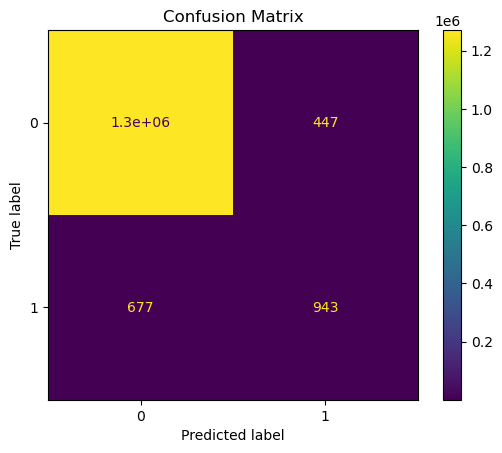

In [16]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix')
plt.show()


In [17]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)


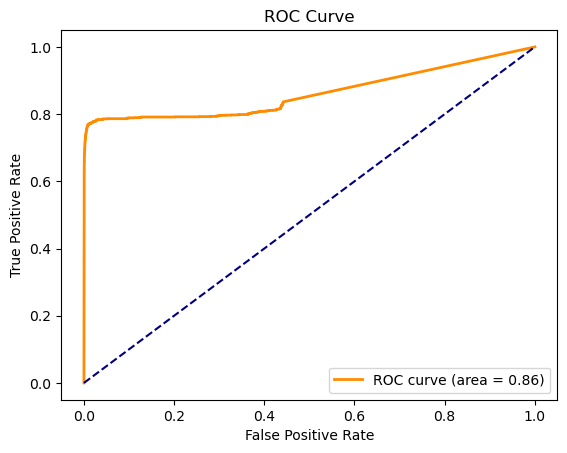

In [18]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


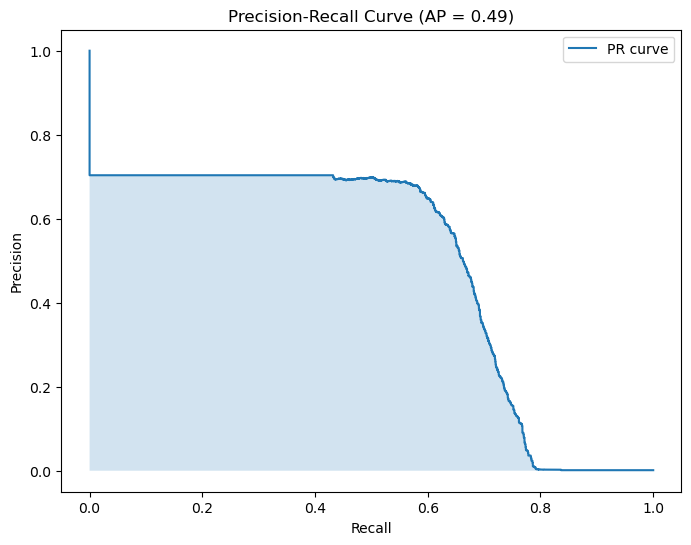

In [19]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, where='post', label='PR curve')
plt.fill_between(recall, precision, step='post', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AP = {average_precision:.2f})')
plt.legend()
plt.show()

In [20]:
user_input = {
    'step': 1,
    'amount': 10000.00,
    'oldbalanceOrg': 30000.00,
    'newbalanceOrig': 0.0,
    'oldbalanceDest': 3000.00,
    'newbalanceDest': 33000.00,
    'isFlaggedFraud': df['isFlaggedFraud'].values[0]
}

In [21]:
user_df = pd.DataFrame([user_input])
user_prediction = model.predict(user_df)

print("\n🔍 Prediction on user input:")
if user_prediction[0] == 1:
    print("🚨 The transaction is predicted as FRAUD.")
else:
    print("✅ The transaction is predicted as NON-FRAUD.")


🔍 Prediction on user input:
🚨 The transaction is predicted as FRAUD.
